### CIS 9: Lab 3b
Unsupervised Learning: clustering

In [66]:
# Name: Shweta Surendar 

A real estate development company gives you a dataset that contains features of buildings and their energy efficiency scores. The company asks you to find the common features or characteristics of the most energy efficient buildings. Your finding will help the company's architects design greener buildings in the future.

The data is in `energy.csv`([source](https://www.kaggle.com/datasets/ulrikthygepedersen/energy-efficiency))

In [67]:
# Import modules
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn import datasets

1. __Read data from the file `energy.csv`__ into a DataFrame.<br>
Then __print the number of rows and columns of the DataFrame__ and __print the first 5 rows__.

In [68]:
data = pd.read_csv('energy.csv')
print("# of rows:", data.shape[0])
print("# of columns:", data.shape[1])
data.iloc[0:5]


# of rows: 768
# of columns: 10


,relative_compactness,surface_area,wall_area,roof_area,overall_height,orientation,glazing_area,glazing_area_distribution,heating_load,cooling_load
0,0.98,514.5,294.0,110.25,7.0,2.0,0.0,0.0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3.0,0.0,0.0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4.0,0.0,0.0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5.0,0.0,0.0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2.0,0.0,0.0,20.84,28.28


#### 2. Do some quick data inspection.<br>
2a. __Check for any NaNs and remove them__.

In [69]:
nanCount = data.isna().sum()
print("NaN Count in each column:")
print(nanCount)
# There are no NaN left 

NaN Count in each column:
relative_compactness         0
surface_area                 0
wall_area                    0
roof_area                    0
overall_height               0
orientation                  0
glazing_area                 0
glazing_area_distribution    0
heating_load                 0
cooling_load                 0
dtype: int64


2b. It looks like all data are numeric values.<br>
__Show the data type of all columns__ to confirm.

Note: The `dtypes` attribute of a numpy array will show the data type of data in the array.

In [70]:
dict(data.dtypes)
# as per the dict that was printed, all of the data types are numeric: float64

{'relative_compactness': dtype('float64'),
 'surface_area': dtype('float64'),
 'wall_area': dtype('float64'),
 'roof_area': dtype('float64'),
 'overall_height': dtype('float64'),
 'orientation': dtype('float64'),
 'glazing_area': dtype('float64'),
 'glazing_area_distribution': dtype('float64'),
 'heating_load': dtype('float64'),
 'cooling_load': dtype('float64')}

3. __Create a plot to see the distribution and correlation of all the features__.<br>
This should be a plot with subplots in 10 rows x 10 columns.<br>
_Note: you don't have to write code for all the subplots._

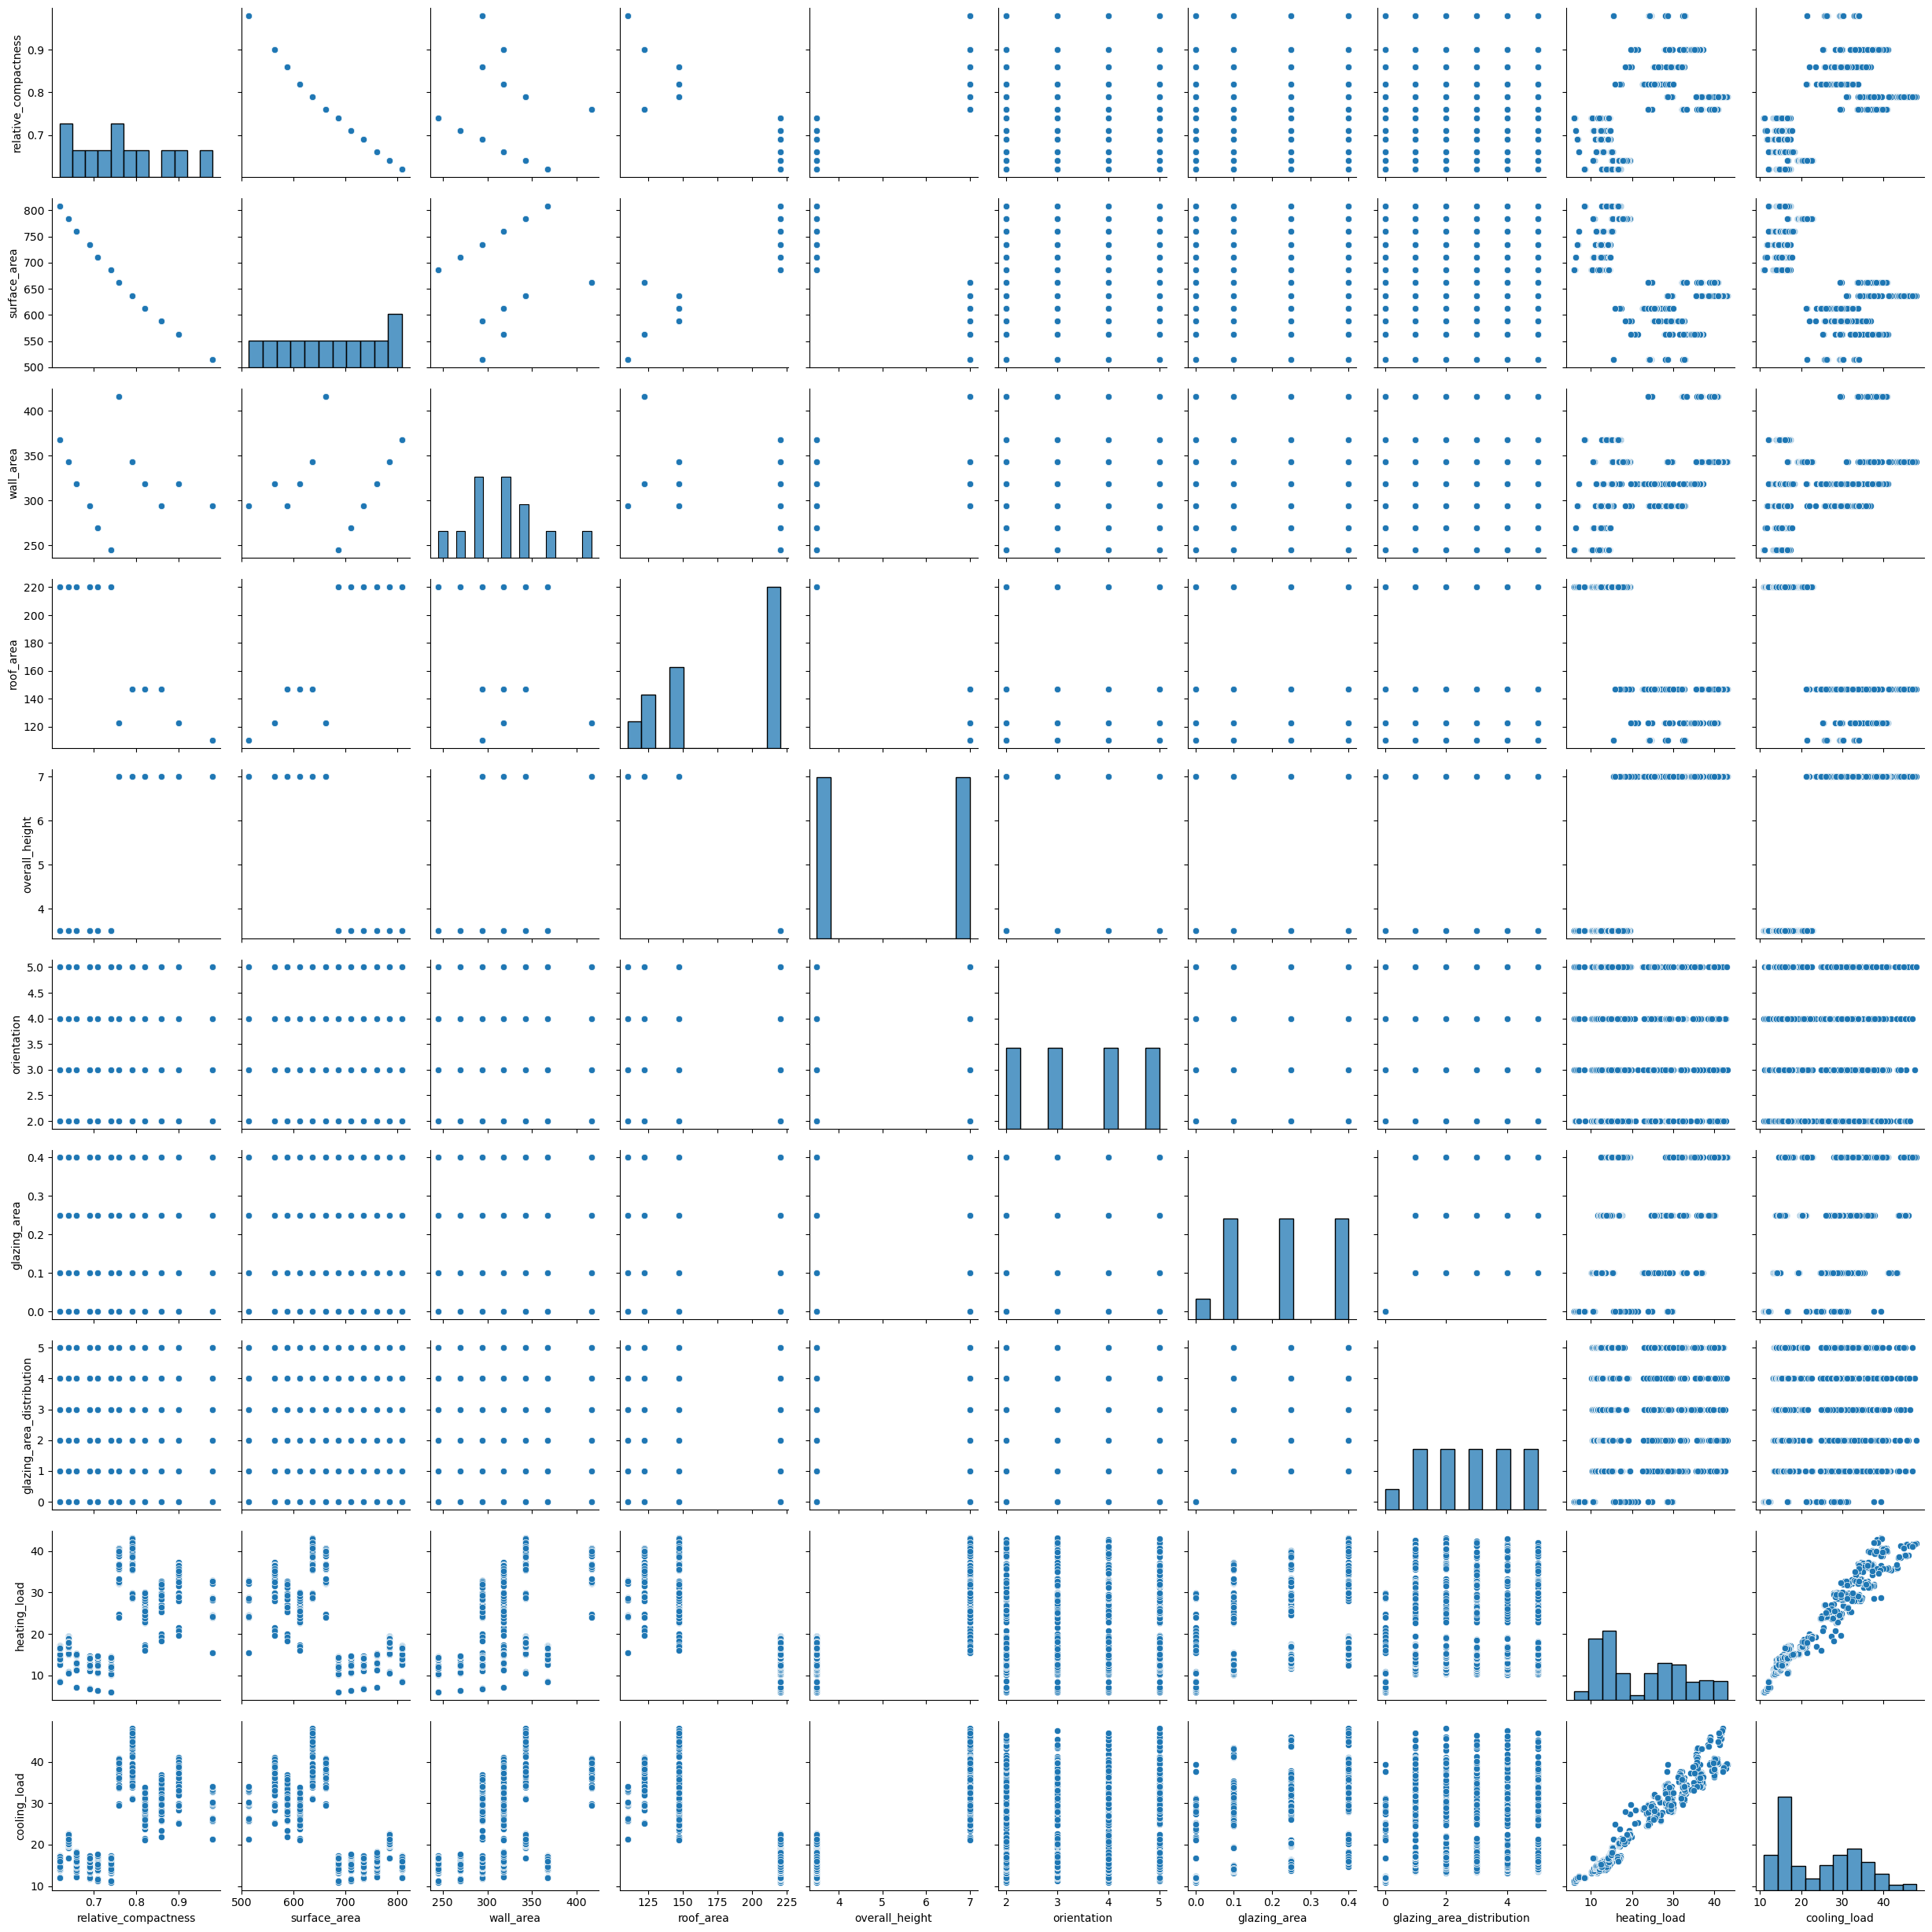

In [71]:
from pandas.plotting import scatter_matrix

sns.pairplot(data)
plt.subplots_adjust(hspace=0.125, wspace=0.125)

plt.show()


#### 4. From the plot we see that we can eliminate some of the features.<br>

4a. The _heating_load_ and _cooling_load_ are the energy efficiency scores. The higher the load, the lower the energy efficiency.<br>
We don't need both features and only need to keep one of them.<br>

In the cell below:
- Create a comment block to explain why we only need to keep one of them. Your explanation should refer to the plot above as a proof that only one is needed.
- Write code to __drop the `cooling_load` column__.

In [72]:
#The scatterplots of the heating_load and cooling_load are almost identical relative to all of the other features meaning heaving both would just be repititive while investigating our data. Keeping only one ensures that all the data we are looking at is unique. 
data = data.drop(columns='cooling_load')
data.iloc[0:5]

,relative_compactness,surface_area,wall_area,roof_area,overall_height,orientation,glazing_area,glazing_area_distribution,heating_load
0,0.98,514.5,294.0,110.25,7.0,2.0,0.0,0.0,15.55
1,0.98,514.5,294.0,110.25,7.0,3.0,0.0,0.0,15.55
2,0.98,514.5,294.0,110.25,7.0,4.0,0.0,0.0,15.55
3,0.98,514.5,294.0,110.25,7.0,5.0,0.0,0.0,15.55
4,0.90,563.5,318.5,122.50,7.0,2.0,0.0,0.0,20.84


# 4b. From the plot, we also notice that we can drop the `relative_compactness`, `orientation`, `glazing_area`, and `glazing_area_distribution` columns.


In the cell below:
- Create a comment block to explain why we can drop these columns. Your explanation should refer to the plot above as a proof that we can drop them.
- Write code to __drop the these column__ and __show the first 5 lines of the DataFrame__.

<AxesSubplot:>

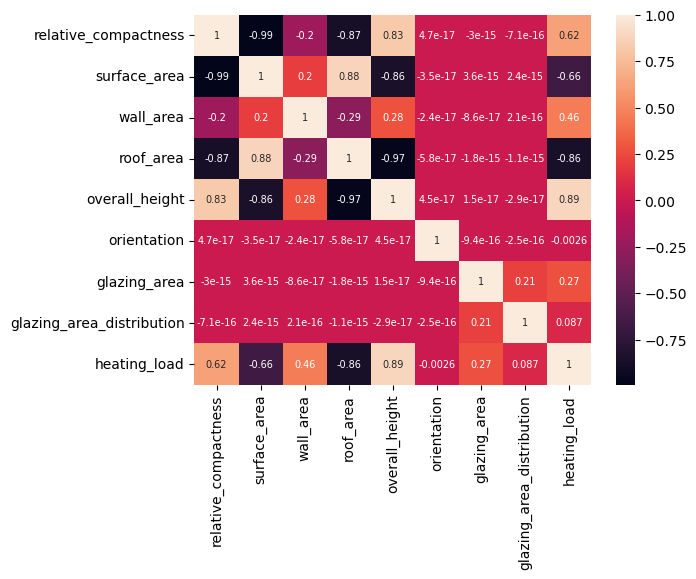

In [73]:
sns.heatmap(data.corr(), annot=True, annot_kws={"size": 7})

In [74]:
#Looking at the scatterplots the specified features are all very similar in their patterns. The data is also spread out in a way where it isn't clear if there is a linear/parabolic/etc. relationship with the other features. Looking at the heatmap above confirms this because these features all have very little correlation with the other features and so they should be dropped.
data = data.drop(columns=['relative_compactness', 'orientation', 'glazing_area', 'glazing_area_distribution'])
data.iloc[0:5]

,surface_area,wall_area,roof_area,overall_height,heating_load
0,514.5,294.0,110.25,7.0,15.55
1,514.5,294.0,110.25,7.0,15.55
2,514.5,294.0,110.25,7.0,15.55
3,514.5,294.0,110.25,7.0,15.55
4,563.5,318.5,122.50,7.0,20.84


4c. __Show the same distribution and correlation plot__ as step 3, but this time with the remaining features.

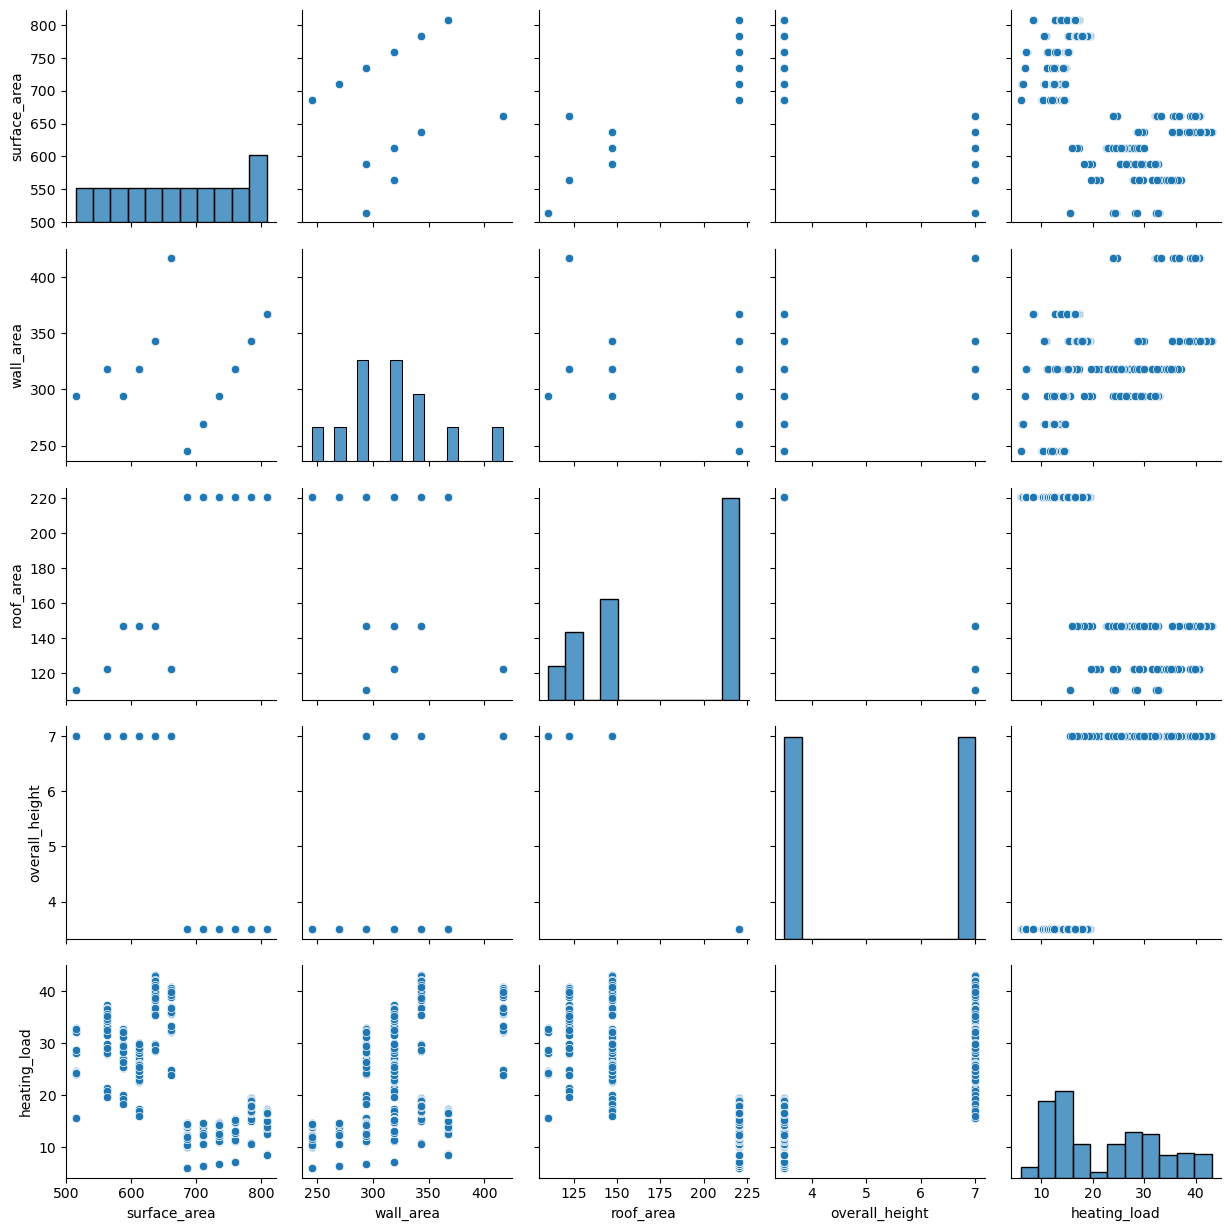

In [58]:
sns.pairplot(data)
plt.subplots_adjust(hspace=0.125, wspace=0.125)
plt.show()

#### 5. Use the k-Means Clustering ML model.<br>

5a. __Make X the DataFrame__ with the remaining features, which are: surface_are, wall_area, roof_area, overall_height, and heating_load.<br>
Then __find the optimum number of clusters__.

C:\Users\shwet\anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


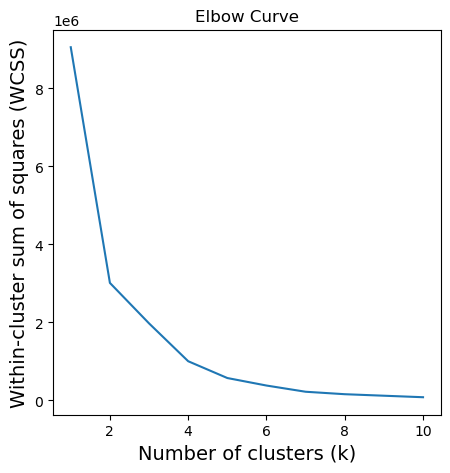

In [75]:
os.environ["OMP_NUM_THREADS"] = "3"
X = data
wcss=[]
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++')
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
    
fig = plt.figure(figsize=(5,5))
plt.title('Elbow Curve')
plt.xlabel('Number of clusters (k)', fontsize=14)
plt.ylabel('Within-cluster sum of squares (WCSS)', fontsize=14)
plt.plot(np.arange(1,11), wcss)

plt.show()



5b. Use a comment to __show the optimum number of clusters__.<br>
Then __train and test the model__ with this number of clusters.

In [93]:
#The optimum number of clusters is 5 because that is the 'elbow point'
kmeans = KMeans(n_clusters = 5, init='k-means++')
kmeans.fit(X)
y_kmeans = kmeans.predict(X)
print(y_kmeans)

[3 3 3 3 3 3 3 3 1 1 1 1 1 1 1 1 1 1 1 1 4 4 4 4 2 2 2 2 2 2 2 2 2 2 2 2 0
 0 0 0 0 0 0 0 0 0 0 0 3 3 3 3 3 3 3 3 1 1 1 1 1 1 1 1 1 1 1 1 4 4 4 4 2 2
 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0 0 3 3 3 3 3 3 3 3 1 1 1 1 1 1 1
 1 1 1 1 1 4 4 4 4 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0 0 3 3 3 3
 3 3 3 3 1 1 1 1 1 1 1 1 1 1 1 1 4 4 4 4 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0
 0 0 0 0 0 0 0 3 3 3 3 3 3 3 3 1 1 1 1 1 1 1 1 1 1 1 1 4 4 4 4 2 2 2 2 2 2
 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0 0 3 3 3 3 3 3 3 3 1 1 1 1 1 1 1 1 1 1 1
 1 4 4 4 4 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0 0 3 3 3 3 3 3 3 3
 1 1 1 1 1 1 1 1 1 1 1 1 4 4 4 4 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0
 0 0 0 3 3 3 3 3 3 3 3 1 1 1 1 1 1 1 1 1 1 1 1 4 4 4 4 2 2 2 2 2 2 2 2 2 2
 2 2 0 0 0 0 0 0 0 0 0 0 0 0 3 3 3 3 3 3 3 3 1 1 1 1 1 1 1 1 1 1 1 1 4 4 4
 4 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0 0 3 3 3 3 3 3 3 3 1 1 1 1
 1 1 1 1 1 1 1 1 4 4 4 4 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0 0 3
 3 3 3 3 3 3 3 1 1 1 1 1 

#### 6. Find the features of each cluster.

6a. The clusters are from 5 features, so it's not practical to plot the clusters.<br>
Create a Raw NBConvert cell below to __explain why it's not practical to plot the clusters__.<br>
Your answer should be very short because it's a clear reason.

6b. Instead, create a DataFrame from each cluster.<br>
You should have as many separate DataFrame as you have number of clusters.<br>

_Use a separate cell for each DataFrame if you like.<br>
Name the new DataFrames descriptively to save your sanity in the next step._

In [94]:
df_clusters = []
for i in range(5):
    df_clusters.append(X[y_kmeans == i])
cluster1=df_clusters[0]
cluster2=df_clusters[1]
cluster3=df_clusters[2]
cluster4=df_clusters[3]
cluster5=df_clusters[4]

6c. With the DataFrames for each cluster:
- Find a way to __compare the features of each cluster__, use as many cell as needed.
- At the end of the notebook, create a Raw NBCovert cell to __write up your finding__: 
<ul>- What features do the most energy efficient buildings share?</ul>
<ul>- How is the energy efficiency of a larger building vs a smaller building?</ul>
<ul>- Other insights can you give to the architects?<br>

Make sure to use data that you found from the comparison step to back your conclusion.

In [95]:
display(cluster1)
display(cluster2)
display(cluster3)
display(cluster4)
display(cluster5)

,surface_area,wall_area,roof_area,overall_height,heating_load
36,759.5,318.5,220.5,3.5,7.18
37,759.5,318.5,220.5,3.5,7.10
38,759.5,318.5,220.5,3.5,7.10
39,759.5,318.5,220.5,3.5,7.10
40,784.0,343.0,220.5,3.5,10.85
...,...,...,...,...,...
763,784.0,343.0,220.5,3.5,17.88
764,808.5,367.5,220.5,3.5,16.54
765,808.5,367.5,220.5,3.5,16.44
766,808.5,367.5,220.5,3.5,16.48


,surface_area,wall_area,roof_area,overall_height,heating_load
8,588.0,294.0,147.0,7.0,19.50
9,588.0,294.0,147.0,7.0,19.95
10,588.0,294.0,147.0,7.0,19.34
11,588.0,294.0,147.0,7.0,18.31
12,612.5,318.5,147.0,7.0,17.05
...,...,...,...,...,...
735,612.5,318.5,147.0,7.0,29.92
736,637.0,343.0,147.0,7.0,42.11
737,637.0,343.0,147.0,7.0,41.96
738,637.0,343.0,147.0,7.0,41.09


,surface_area,wall_area,roof_area,overall_height,heating_load
24,686.0,245.0,220.5,3.5,6.07
25,686.0,245.0,220.5,3.5,6.05
26,686.0,245.0,220.5,3.5,6.01
27,686.0,245.0,220.5,3.5,6.04
28,710.5,269.5,220.5,3.5,6.37
...,...,...,...,...,...
751,710.5,269.5,220.5,3.5,12.42
752,735.0,294.0,220.5,3.5,14.12
753,735.0,294.0,220.5,3.5,14.28
754,735.0,294.0,220.5,3.5,14.37


,surface_area,wall_area,roof_area,overall_height,heating_load
0,514.5,294.0,110.25,7.0,15.55
1,514.5,294.0,110.25,7.0,15.55
2,514.5,294.0,110.25,7.0,15.55
3,514.5,294.0,110.25,7.0,15.55
4,563.5,318.5,122.50,7.0,20.84
...,...,...,...,...,...
723,514.5,294.0,110.25,7.0,32.73
724,563.5,318.5,122.50,7.0,35.67
725,563.5,318.5,122.50,7.0,35.01
726,563.5,318.5,122.50,7.0,34.72


,surface_area,wall_area,roof_area,overall_height,heating_load
20,661.5,416.5,122.5,7.0,24.77
21,661.5,416.5,122.5,7.0,23.93
22,661.5,416.5,122.5,7.0,24.77
23,661.5,416.5,122.5,7.0,23.93
68,661.5,416.5,122.5,7.0,32.96
...,...,...,...,...,...
695,661.5,416.5,122.5,7.0,40.11
740,661.5,416.5,122.5,7.0,38.82
741,661.5,416.5,122.5,7.0,39.72
742,661.5,416.5,122.5,7.0,39.31


In [143]:
df_clusters[1]['heating_load'].mean()

30.905312500000004

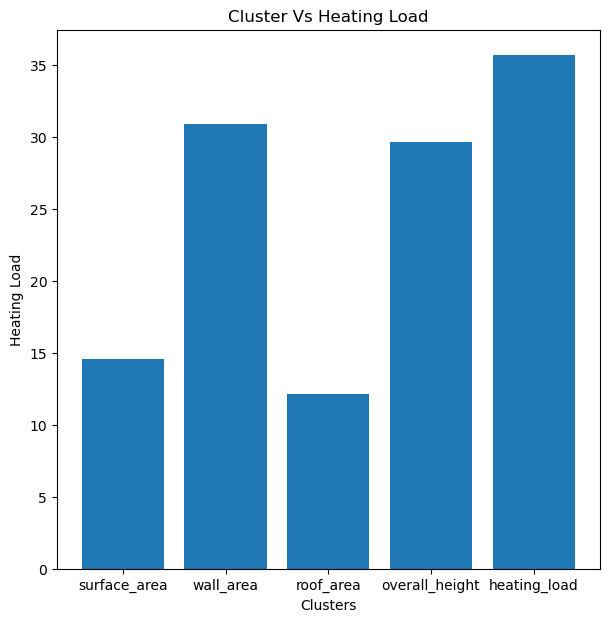

In [163]:
values=[]
features=[]
for i in range(len(df_clusters)):
    features.append("Cluster "+str(i+1))
    values.append(df_clusters[i]['heating_load'].mean())
plt.title("Cluster Vs Heating Load")
plt.xlabel("Clusters")
plt.ylabel("Heating Load")
plt.rcParams['figure.figsize'] = [7, 7]
plt.xticks(X_axis, X)
plt.bar(features, values)
plt.show()

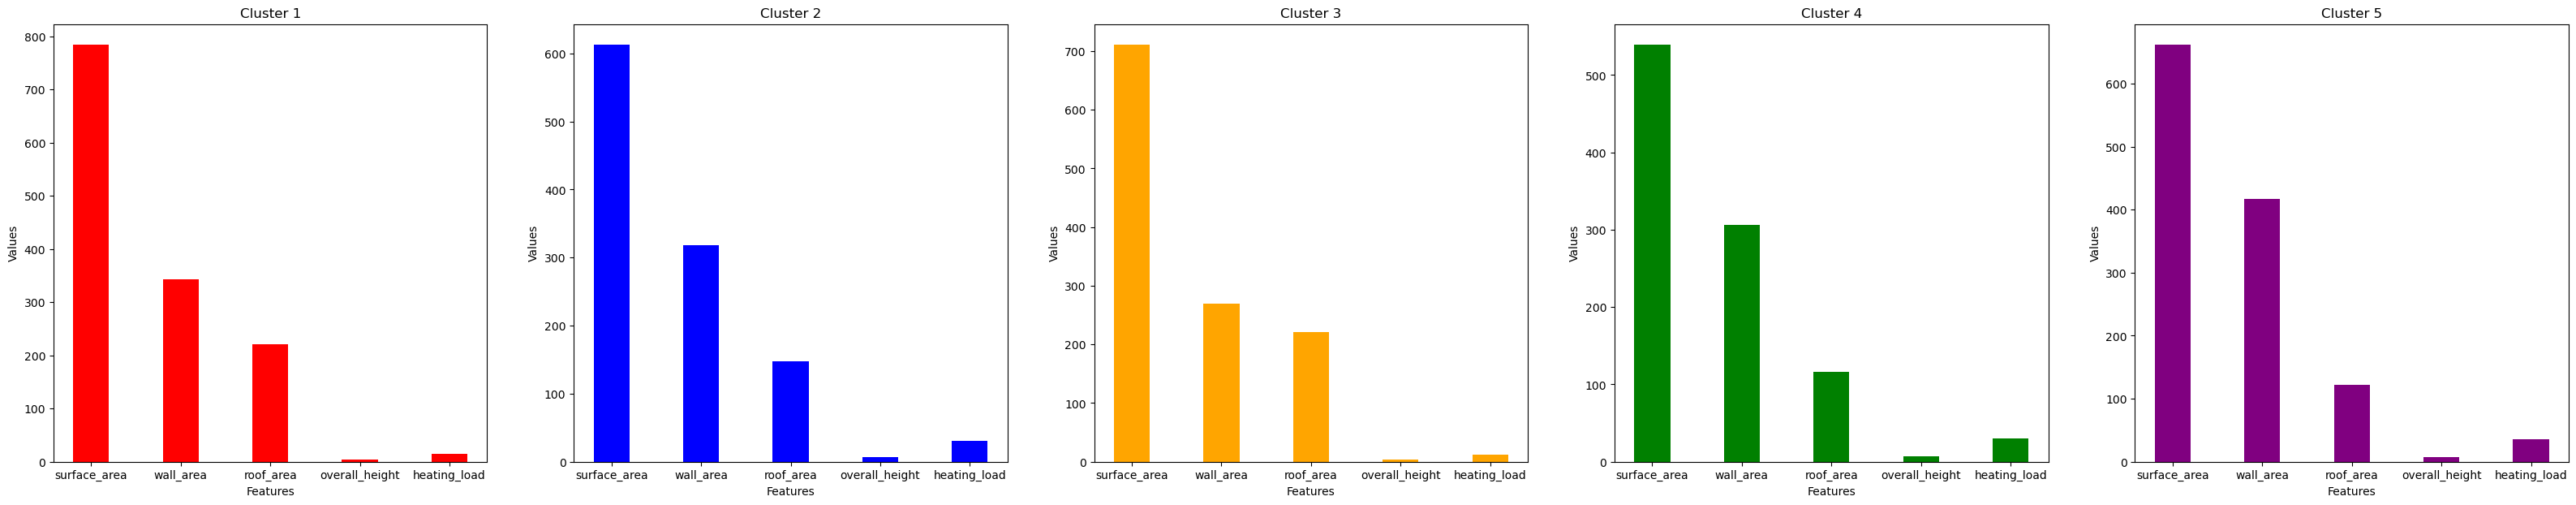

In [136]:
colors = {0: 'red', 1:'blue', 2:'orange', 3:'green', 4:'purple'}
for i in range(len(df_clusters)):
    plt.subplot(1,5, i+1)
    features = df_clusters[i].columns
    values = list(df_clusters[i].mean(axis=0))

 
    # creating the bar plot
    plt.bar(features, values, color = colors[i],
        width = 0.4)
 
    plt.xlabel("Features")
    plt.ylabel("Values")
    plt.title("Cluster " + str(i+1) + "")
plt.rcParams['figure.figsize'] = [40, 7]
plt.subplots_adjust(wspace=0.2)
plt.xticks(X_axis, X)
plt.show()

In [ ]:
Clusters 1 and 3 have the most energy efficient buildings. This is clear because the first graph "Cluster Vs Heating Load" shows us that Clusters 1 and 3 have the lowest mean value for the heating_load feature, showing that it is the most energy efficient. Looking at the second set of graph, we can see how the features in Clusters 1 and 3 compare to the rest of the clusters. The buildings in Clusters 1 and 3 have higher surface areas, higher roof areas, lower overall height, and less wall area. A larger building that hasa taller overall height would be less energy efficient than a shorter building as per the graphs above.   